# EXPLORATORY DATA ANALYSIS(EDA):
In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics using visual methods. It refers to a critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with help of summary statics and graphical representations.

# Problem statement:
As a business manager, try to find out the weak areas where you can work to make more profit.

In [1]:
#Importing required librarie
import pandas as pd
import numpy as np

In [2]:
# Loading dataset using pandas
data=pd.read_csv('SampleSuperstore.csv')
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
#Dataset shape to get row and column count
data.shape

(9994, 13)

In [4]:
#returns object containing count of unique values
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [5]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [6]:
#Checking for any null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [8]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

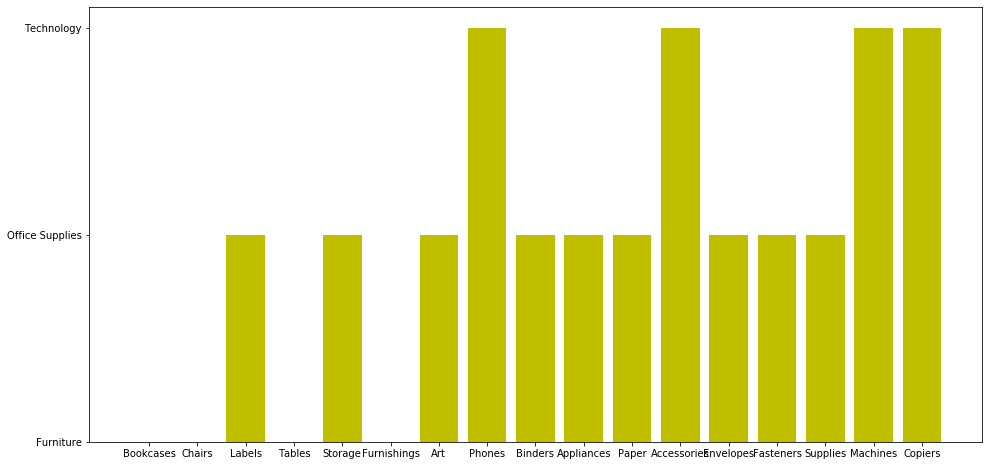

In [10]:
#To see how the sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=data,color='y')
plt.show()

<Figure size 576x432 with 0 Axes>

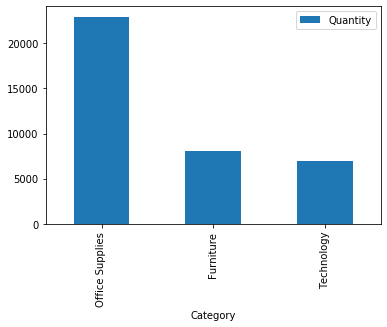

In [12]:
# Highest sales of category per states
fig=plt.figure(figsize=(8,6))
data.groupby('Category')['State','Quantity'].sum().sort_values(by='Quantity',ascending=False).plot.bar(ylim=0)
plt.show()

<Figure size 576x432 with 0 Axes>

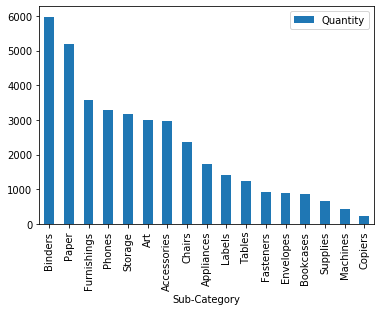

In [39]:
fig=plt.figure(figsize=(8,6))
data.groupby('Sub-Category')['State','Quantity'].sum().sort_values(by='Quantity',ascending=False).plot.bar(ylim=0)
plt.show()

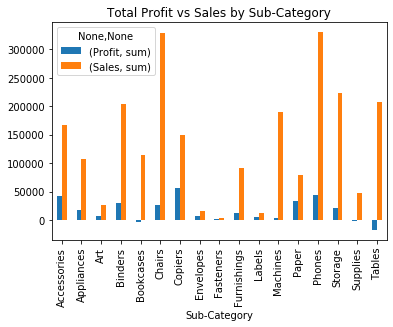

In [43]:
# To see which sub-category has better profit/sales
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit vs Sales by Sub-Category')
plt.show()

In [45]:
data['Cost']=data['Sales']-data['Profit']
data['Cost'].head()
data.groupby('Sub-Category')['Cost'].max().sort_values()

Sub-Category
Fasteners         92.4264
Paper            381.6540
Envelopes        400.5846
Labels           401.1048
Art             1001.7216
Furnishings     1077.1740
Appliances      1890.0864
Storage         2142.0609
Accessories     2711.3697
Phones          4040.3038
Bookcases       4748.4822
Chairs          5047.0560
Binders         5879.4768
Tables          6159.9564
Supplies        7860.1440
Copiers         9099.9740
Machines       24449.5584
Name: Cost, dtype: float64

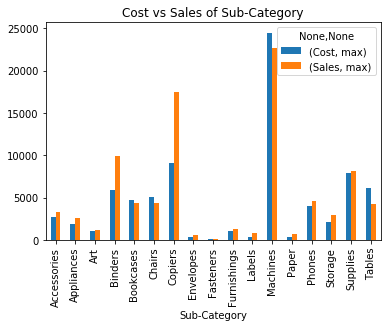

In [44]:
#To see which sub-category has maximum sales/cost
data.groupby('Sub-Category')['Cost','Sales'].agg(['max']).plot.bar()
plt.title('Cost vs Sales of Sub-Category')
plt.show()

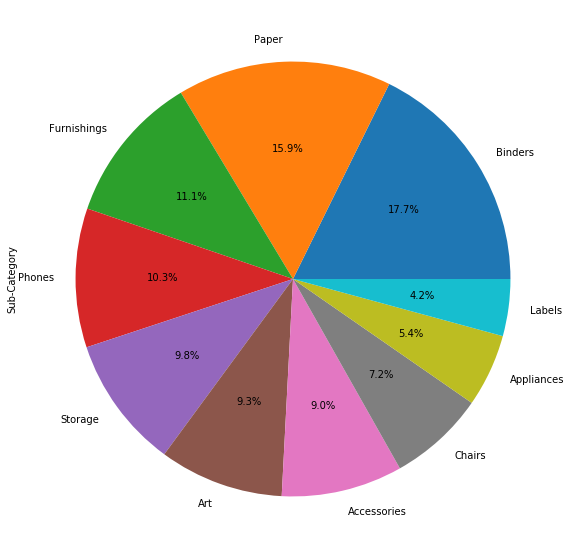

In [9]:
plt.figure(figsize=(12,10))
data['Sub-Category'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

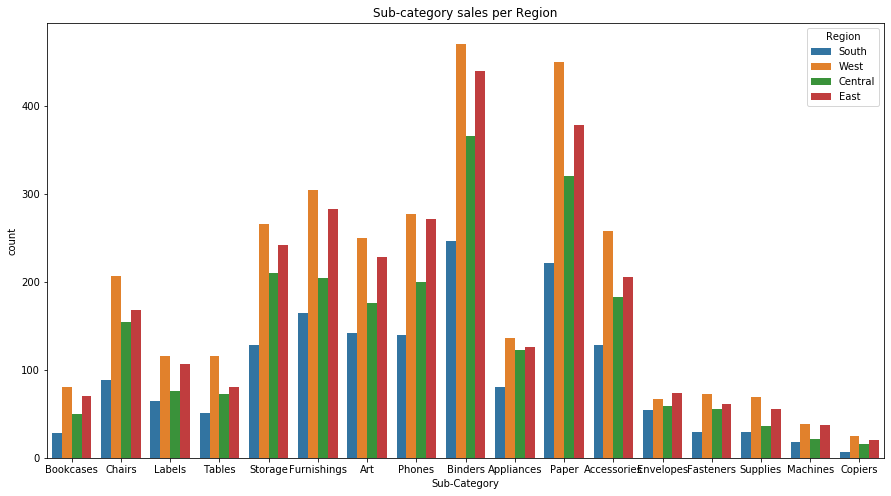

In [5]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=data)
plt.title('Sub-category sales per Region')
plt.show()

In [26]:
data['Profit %']=(data['Profit']/data['Cost'])*100

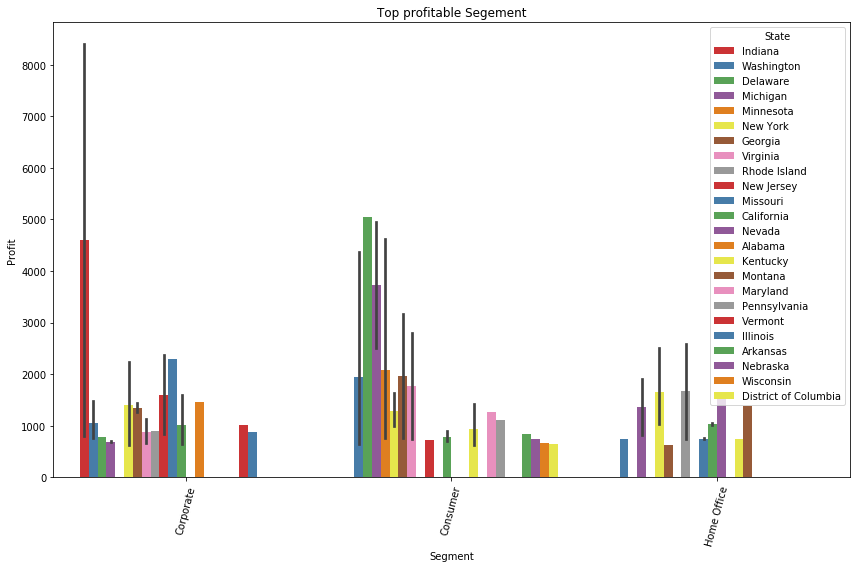

In [31]:
#To see which segemnt has highest profit with respect states
profit_achieved = data.sort_values(['Profit'], ascending=False).head(90)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Segment', y='Profit',hue='State',palette='Set1', data=profit_achieved, ax=ax)
ax.set_title("Top profitable Segement")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

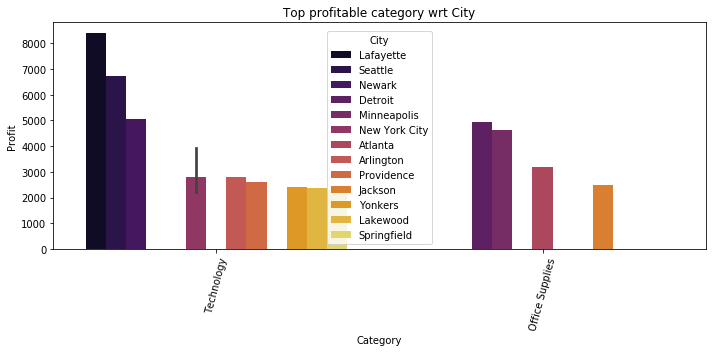

In [55]:
##To see which category has highest profit with respect city
top_category = data.sort_values(['Profit'], ascending=False).head(15)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
p = sns.barplot(x='Category', y='Profit',hue='City',palette='inferno', data=top_category, ax=ax)
ax.set_title("Top profitable category wrt City")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

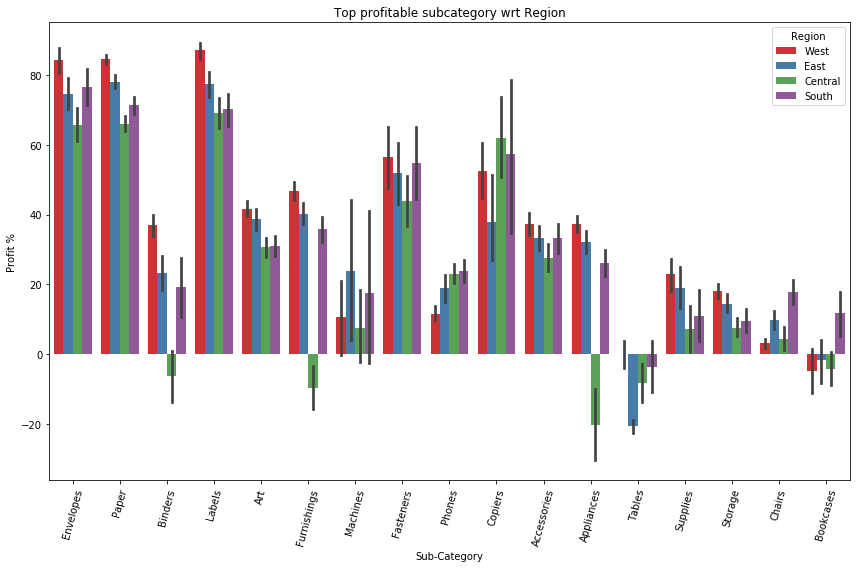

In [36]:
top_subcategory = data.sort_values(['Profit %'], ascending=False)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Sub-Category', y='Profit %',hue='Region',palette='Set1', data=top_subcategory, ax=ax)
ax.set_title("Top profitable subcategory wrt Region")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()